In [1]:
#%matplotlib widget
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import pack_vis_sol
import matplotlib.pyplot as plt
importlib.reload(kgs)
#pack_vis.plot_polygons([kgs.center_tree] + kgs.convex_breakdown)

local
local


<module 'kaggle_support' from '/mnt/d/packing/code/analysis/../core/kaggle_support.py'>

In [10]:
N_trees = 155
import numpy as np
import glob
files = glob.glob(kgs.temp_dir + f'/controller_runs/repro/ga_N{N_trees}_*.pickle')
print(files)
all_data = []
#print(N_trees,files)
for f in files:
    #if ('seed90' in f) or ('seed92' in f) or ('seed91' in f):
    dat = kgs.dill_load(f)
    all_data.append(dat)

['/mnt/d//packing/temp//controller_runs/repro/ga_N155_seed120_done.pickle', '/mnt/d//packing/temp//controller_runs/repro/ga_N155_seed122_done.pickle', '/mnt/d//packing/temp//controller_runs/repro/ga_N155_seed124_done.pickle']


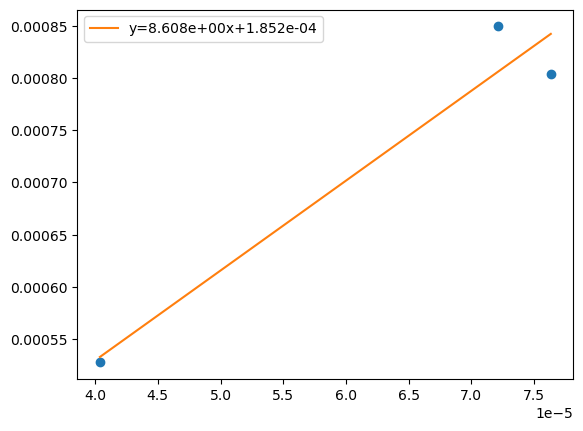

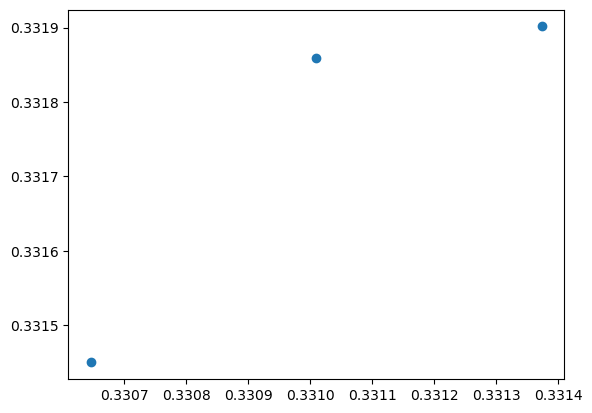

In [11]:
scores = [d.ga.champions[0].phenotype.h[0,0].get()**2/N_trees for d in all_data]
diffs = [scores[i]-(d.ga.champions[0].fitness[0,0])  for i,d in enumerate(all_data)]
plt.plot([d.ga.best_costs_per_generation[0][-1][1] for d in all_data], diffs, 'o')
x = np.array([d.ga.best_costs_per_generation[0][-1][1] for d in all_data])
y = np.array(diffs)
coeffs = np.polyfit(x, y, 1)
a = float(coeffs[0])
b = float(coeffs[1])
xs = np.linspace(x.min(), x.max(), 200)
plt.plot(xs, a*xs + b, '-', color='C1', label=f'y={a:.3e}x+{b:.3e}')
plt.legend()
plt.figure()
plt.plot([d.ga.best_costs_per_generation[0][-1][0]  for i,d in enumerate(all_data)], scores, 'o')

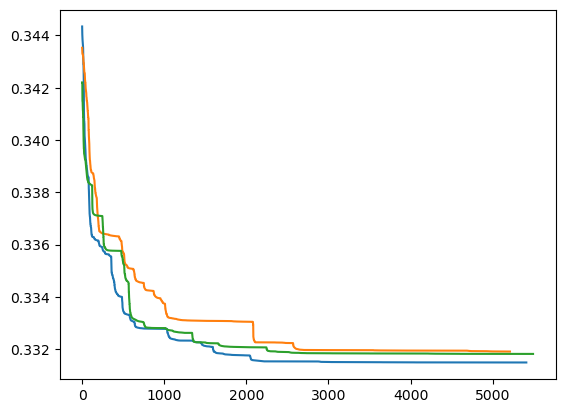

In [12]:
traces_corrected = [ [x[0]+(b+a*x[1]) for x in d.ga.best_costs_per_generation[0]] for d in all_data]
# make each trace monotonically decreasing (by taking the minimum value so far)
traces_corrected = [np.minimum.accumulate(trace) for trace in traces_corrected]
for t in traces_corrected:
    plt.plot(t[50:])

In [13]:
np.mean([t[500] for t in traces_corrected]), np.min([np.min(t) for t in traces_corrected])

(np.float32(0.33535567), np.float32(0.33148837))

In [6]:
np.mean([t[500] for t in traces_corrected])-np.min([np.min(t) for t in traces_corrected])

np.float32(0.0038672984)